## Predicting house value using machine learning regression analysis

#### author: bhavesh patel
#### credit:  GraphLab

#### some definitions.

rmse = root mean squared error.  This is used to identify errors and compare different models.
rss = residual sum of squares is an error metric for regression.

These are two common measures of error regression, and RMSE is simply the square root of the mean RSS:

rmse = square root of (rss/n) 
where n=number of data points.

## Predicting house value with regression analysis.

In [1]:
import graphlab

In [2]:
# Limit number of worker processes. This preserves system memory, which prevents hosted notebooks from crashing.
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1481927570.log


This non-commercial license of GraphLab Create for academic use is assigned to bhaveshhk8@gmail.com and will expire on October 17, 2017.


In [3]:
# load data.
homesales = graphlab.SFrame('home_data.gl')

In [4]:
homesales

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000 |    3     |     2     |     1680    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000 |    4     |    4.5    |     5420    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500 |    3     |    2.25   |     1715    |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850 |    3     |    1.5    |     1060    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500 |    3     |     1     |     1780    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000 |    3     |    2.5    |     1890    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |   1    |     0      |  0   |     3     |   6   |    770     |       0       |
|   5000   |   1    |     0      |  0   |     5     |   7   |    1050    |      910      |
|   8080   |   1    |     0      |  0   |     3     |   8   |    1680    |       0       |
|  101930  |   1    |     0      |  0   |     3     |   11  |    3890    |      1530     |
|   6819   |   2    |     0      |  0   |     3     |   7   |    1715    |       0       |
|   9711   |   1    |     0      |  0   |     3     |   7   |    1060    |       0       |
|   7470   |   1    |     0      |  0   |     3     |   7   |    1050    |      730      |
|   6560   |   2    |     0      |  0   |     3     |   7   |    1890    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1933   |      0       |  98028  | 47.73792661 | -122.23319601 |     2720.0    | ... |
|   1965   |      0       |  98136  |   47.52082  | -122.39318505 |     1360.0    | ... |
|   1987   |      0       |  98074  | 47.61681228 | -122.04490059 |     1800.0    | ... |
|   2001   |      0       |  98053  | 47.65611835 | -122.00528655 |     4760.0    | ... |
|   1995   |      0       |  98003  | 47.30972002 | -122.32704857 |     2238.0    | ... |
|   1963   |      0       |  98198  | 47.40949984 | -122.31457273 |     1650.0    | ... |
|   1960   |      0       |  98146  | 47.51229381 | -122.33659507 |     1780.0    | ... |
|   2003   |      0       |  98038  | 47.36840673 |  -122

In [5]:
# show graphis here, not a pop up window.
graphlab.canvas.set_target('ipynb')

In [6]:
# there are total 21K+ rows.  Let's view the data.
homesales.show(view="Scatter Plot", x="sqft_living", y="price")

## Let's create regression model for prediction.

In [7]:
# first get training data set and test data set.  80% training data, 20% test data.
train_data, test_data = homesales.random_split(0.8, seed=0)

In [8]:
# build regression model with one variable for sq ft and store the results.
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.023775     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [9]:
# let's perform some functions.
print test_data['price'].mean()

543054.042563


In [10]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


In [11]:
print train_data['price'].mean()

539366.628221


In [12]:
print sqft_model.evaluate(train_data)

{'max_error': 4349521.9261700595, 'rmse': 262943.6137536495}


In [13]:
sqft_model.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -47114.0206702 | 4923.34437753 |
| sqft_living |  None | 281.957850166  | 2.16405465323 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

In [14]:
sqft_model.show()

In [15]:
homesales.show(view='BoxWhisker Plot', x='zipcode', y='price')

## Explore more attributes in linear regression.

#### zip code 98039 has most expensive houses.  

In [16]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [17]:
homesales[my_features].show()

### now let's build another regression model with more attributes.

In [18]:
more_attribute_model=graphlab.linear_regression.create(train_data, target='price', features=my_features,validation_set=None )

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.042474     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [19]:
# now let's compare the two model.
print sqft_model.evaluate(test_data)
print more_attribute_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}
{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}


In [20]:
# with more attributes, we can see that error have reduced and RMSE has reduced too.
# That's good and bad.  We will see some overfitting in predicting house value.

/Users/admin/miniconda2/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


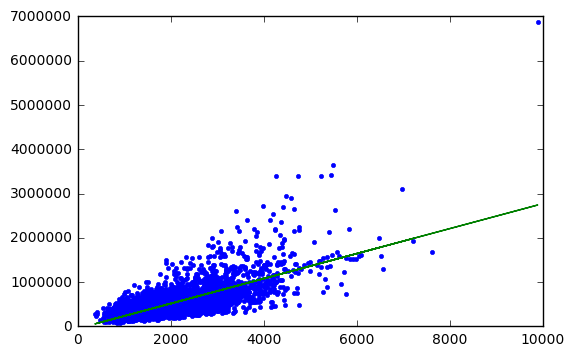

In [21]:
# let's get matplotlib to plot the regression analysis.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

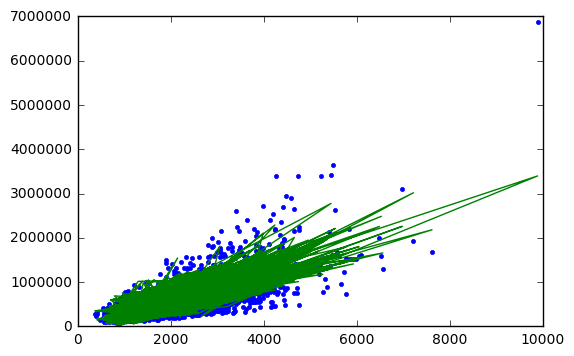

In [22]:
#Ok now let's build the model with second regression we built with more attributes.

plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],more_attribute_model.predict(test_data),'-')

In [23]:
# now let's get one of the house id and try to predict the value of that house using both the regression models.
# we needt to get the object for one of the house.  Let's pick the first house in the data, which has id 
# of 7129300520.

house1=homesales[homesales['id']=='7129300520']

In [24]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900 |    3     |     1     |     1180    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [25]:
# now let's use this object and call our regression analysis model to predict house price.

print sqft_model.predict(house1)
print more_attribute_model.predict(house1)

[285596.24252564885]
[211196.3344448047]


In [26]:
# ok.  So actual house value is $221,900.  Our SQFT model predicted house value of $285,596 while our more attribute
# model predicted house value of $211,196.  So we can say that more attribute value is showing us correct results.
# Well, its art with science.  It is not always true.  See below example for other way round.

In [27]:
# now let's pick another house:  5309101200

house2 = homesales[homesales['id']=='5309101200']
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [28]:
# now let's predict values for this house.

print sqft_model.predict(house2)
print more_attribute_model.predict(house2)

[629584.8197281545]
[721918.9333272863]


In [29]:
# In this case, actual house value is: $620,000.  SQFT model predicted $629,584 while additional attribute model 
# predicted $721,918.  Really bad!  

In [30]:
# now let's select the house with zip code 

housesHighValueZip=homesales[homesales['zipcode']=='98039']
housesHighValueZip

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 3625049014 | 2014-08-29 00:00:00+00:00 | 2950000 |    4     |    3.5    |     4860    |
| 2540700110 | 2015-02-12 00:00:00+00:00 | 1905000 |    4     |    3.5    |     4210    |
| 3262300940 | 2014-11-07 00:00:00+00:00 |  875000 |    3     |     1     |     1220    |
| 3262300940 | 2015-02-10 00:00:00+00:00 |  940000 |    3     |     1     |     1220    |
| 6447300265 | 2014-10-14 00:00:00+00:00 | 4000000 |    4     |    5.5    |     7080    |
| 2470100110 | 2014-08-04 00:00:00+00:00 | 5570000 |    5     |    5.75   |     9200    |
| 2210500019 | 2015-03-24 00:00:00+00:00 |  937500 |    3     |     1     |     1320    |
| 6447300345 | 2015-04-06 00:00:00+00:00 | 1160000 |    4     |     3     |     2680    |
| 6447300225 | 2014-11-06 00:00:00+00:00 | 1880000 |    3     |    2.75   |     2620    |
| 2525049148 | 2014-10-07 00:00:00+00:00 | 3418800 |    5     |     5     |     5450    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  23885   |   2    |     0      |  0   |     3     |   12  |    4860    |       0       |
|  18564   |   2    |     0      |  0   |     3     |   11  |    4210    |       0       |
|   8119   |   1    |     0      |  0   |     4     |   7   |    1220    |       0       |
|   8119   |   1    |     0      |  0   |     4     |   7   |    1220    |       0       |
|  16573   |   2    |     0      |  0   |     3     |   12  |    5760    |      1320     |
|  35069   |   2    |     0      |  0   |     3     |   13  |    6200    |      3000     |
|   8500   |   1    |     0      |  0   |     4     |   7   |    1320    |       0       |
|  15438   |   2    |     0      |  2   |     3     |   8   |    2680    |       0       |
|  17919   |   1    |     0      |  1   |     4     |   9   |    2620    |       0       |
|  20412   |   2    |     0      |  0   |     3     |   11  |    5450    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1996   |      0       |  98039  | 47.61717049 | -122.23040939 |     3580.0    | ... |
|   2001   |      0       |  98039  | 47.62060082 |  -122.2245047 |     3520.0    | ... |
|   1955   |      0       |  98039  | 47.63281908 | -122.23554392 |     1910.0    | ... |
|   1955   |      0       |  98039  | 47.63281908 | -122.23554392 |     1910.0    | ... |
|   2008   |      0       |  98039  | 47.61512031 | -122.22420058 |     3140.0    | ... |
|   2001   |      0       |  98039  | 47.62888314 | -122.23346379 |     3560.0    | ... |
|   1954   |      0       |  98039  | 47.61872888 | -122.22643371 |     2790.0    | ... |
|   1902   |     1956     |  98039  | 47.61089438 | -122.22582388 |     4480.0    | ... |
|   1949   |      0       |  98039  | 47.61435052 | -122.22772057 |     3400.0    | ... |
|   2014   |      0       |  98039  | 47.62087993 | -12

In [31]:
# what's average price for the zip?

print housesHighValueZip['price'].mean()

2160606.6


In [32]:
# SFrame filtering.  
#select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

houseFilter1 = homesales[(homesales['sqft_living'] > 2000) & (homesales['sqft_living'] <= 4000)]
houseFilter1


Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 1736800520 | 2015-04-03 00:00:00+00:00 |  662500 |    3     |    2.5    |     3560    |
| 9297300055 | 2015-01-24 00:00:00+00:00 |  650000 |    4     |     3     |     2950    |
| 2524049179 | 2014-08-26 00:00:00+00:00 | 2000000 |    3     |    2.75   |     3050    |
| 7137970340 | 2014-07-03 00:00:00+00:00 |  285000 |    5     |    2.5    |     2270    |
| 3814700200 | 2014-11-20 00:00:00+00:00 |  329000 |    3     |    2.25   |     2450    |
| 1794500383 | 2014-06-26 00:00:00+00:00 |  937000 |    3     |    1.75   |     2450    |
| 1873100390 | 2015-03-02 00:00:00+00:00 |  719000 |    4     |    2.5    |     2570    |
| 8562750320 | 2014-11-10 00:00:00+00:00 |  580500 |    3     |    2.5    |     2320    |
| 0461000390 | 2014-06-24 00:00:00+00:00 |  687500 |    4     |    1.75   |     2330    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|   9796   |   1    |     0      |  0   |     3     |   8   |    1860    |      1700     |
|   5000   |   2    |     0      |  3   |     3     |   9   |    1980    |      970      |
|  44867   |   1    |     0      |  4   |     3     |   9   |    2330    |      720      |
|   6300   |   2    |     0      |  0   |     3     |   8   |    2270    |       0       |
|   6500   |   2    |     0      |  0   |     4     |   8   |    2450    |       0       |
|   2691   |   2    |     0      |  0   |     3     |   8   |    1750    |      700      |
|   7173   |   2    |     0      |  0   |     3     |   8   |    2570    |       0       |
|   3980   |   2    |     0      |  0   |     3     |   8   |    2320    |       0       |
|   5000   |  1.5   |     0      |  0   |     4     |   7   |    1510    |      820      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1965   |      0       |  98007  | 47.60065993 | -122.14529566 |     2210.0    | ... |
|   1979   |      0       |  98126  | 47.57136955 | -122.37541218 |     2140.0    | ... |
|   1968   |      0       |  98040  | 47.53164379 | -122.23345881 |     4110.0    | ... |
|   1995   |      0       |  98092  | 47.32658071 | -122.16892624 |     2240.0    | ... |
|   1985   |      0       |  98030  | 47.37386303 | -122.17228981 |     2200.0    | ... |
|   1915   |      0       |  98119  | 47.63855772 | -122.35985573 |     1760.0    | ... |
|   2005   |      0       |  98052  | 47.70732168 | -122.11029785 |     2630.0    | ... |
|   2003   |      0       |  98027  |  47.5391103 | -122.06971484 |     2580.0    | ... |
|   1929   |      0       |  98117  | 47.68228235 | -12

In [33]:
houseFilter1.show()

In [34]:
# alright, now to regression model 3, where we use lot more features.

even_more_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [35]:
# build regression model using these features.
# more_attribute_model=graphlab.linear_regression.create(train_data, target='price', features=my_features,validation_set=None )

even_more_att_model=graphlab.linear_regression.create(train_data, target='price', features=even_more_features,validation_set=None )


Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.080677     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [36]:
# now let's get RMSE value for all three models we built.

print sqft_model.evaluate(test_data)
print more_attribute_model.evaluate(test_data)
print even_more_att_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}
{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}
{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}
